# Segunda Entrega

## Representação da solução

Como a base está representada através de pontos que são os vértices e as arestas são as distâncias euclideanas para todos os pontos.
Resumindo, todos os pontos estão "conectados" por uma aresta de peso igual a distância euclideana entre eles.

### Heuristicas Construtivas do PCV
* Heuristica do vizinho mais próximo
* Heuristica da inserção do mais próximo
* Heuristica da inserção do mais distante

In [83]:
#%matplotlib inline
%matplotlib notebook
import matplotlib.pyplot as plt

import os
import numpy as np
from math import sqrt

In [2]:
nome_de_instancias = os.listdir("./dataset/")[:-1]

In [3]:
file_name = "./dataset/" + nome_de_instancias[12]
with open(file_name, "r") as f:
    text = f.read().split("\n")[6:-1]

In [4]:
text[0], len(text)

('1 909444 143969', 1000)

In [5]:
coordenadas = []
for vertice in text:
    coordenadas.append(vertice.split(" "))

In [6]:
coordenadas[0], len(text)

(['1', '909444', '143969'], 1000)

In [8]:
coordenadas_np = np.array(coordenadas).astype("int")

In [9]:
coordenadas_np[0], coordenadas_np.shape

(array([     1, 909444, 143969]), (1000, 3))

In [10]:
pontos = []
for no_x_y in coordenadas_np:
    pontos.append([no_x_y[1], no_x_y[2]])
pontos[0:5], len(pontos)

([[909444, 143969],
  [515900, 293384],
  [749939, 228922],
  [404862, 491857],
  [286983, 437810]],
 1000)

In [110]:
tamanho = 100
pontos = pontos[0:tamanho]
pontos[0:5], len(pontos)

([[909444, 143969],
  [515900, 293384],
  [749939, 228922],
  [404862, 491857],
  [286983, 437810]],
 100)

# Arquivos com as instâncias aberto, agora criar  as funções

# Cálculo das distâncias

In [12]:
def dist(a, b):
    return sqrt(pow(a[0] - b[0], 2) + pow(a[1] - b[1], 2))

def distancia_percurso(points):
    # Caso em que a lista é zero
    if len(points) == 0:
        return 0
    
    # Iniciando a distância com zero
    distancia_percurso = 0
    
    # Soma todos os pontos
    for i in range(len(points) - 1):
        distancia_percurso += dist(points[i], points[i + 1])
    
    # Soma a distância do último ponto com o primeiro
    distancia_percurso += dist(points[len(points)-1], points[0])
    return distancia_percurso

# Heuristica de Construção

In [13]:
def vizinhos_mais_proximos(array_points):
    
    points = list(array_points)
    
    if len(points) == 0:
        return []
    
    # Escolhe o vértice inicial
    current = points[0]
    # Armazena em um array, que terá o caminho criado pelo nnpoints
    nnpoints = [current]
    # Remove do conjuto total
    points.remove(current)
    # Repete até que o conjunto inicial acabe
    while len(points) > 0:
        next = points[0]
        # Escolhe um vértice u mais próximo de um dos extremos de C
        for point in points:
            if dist(current, point) < dist(current, next):
                next = point
        # Acrescenta o vértice no array
        nnpoints.append(next)
        # Remove do conjunto
        points.remove(next)
        # considera que o novo nó a ser utilizado será o do final
        current = next
        # Numeros faltantes de pontos
        print("Len points", len(points), end="\r")
    return nnpoints, distancia_percurso(nnpoints)

# Movimento de Vizinhança

## 2-OPT

In [34]:
def two_opt(array_points):
    points = list(array_points)
    
    melhor_ate_agora = list(points)
    print("Dist inicial:", distancia_percurso(melhor_ate_agora))
    
    for i in range(len(points) - 1):
        for j in range(i + 2, len(points) - 1):
            # Verifica se a troca de 2 arestas é vantajosa, se sim, troque pela menor
            if dist(points[i], points[i+1]) + dist(points[j], points[j+1]) > dist(points[i], points[j]) + dist(points[i+1], points[j+1]):          
                #print("vai dar swap")
                # SWAP 
                points[i+1:j+1] = reversed(points[i+1:j+1])
                #print(points[i+1:j+1], reversed(points[i+1:j+1]))
                if distancia_percurso(points) < distancia_percurso(melhor_ate_agora):
                    #print("pegou um")
                    melhor_ate_agora = points
                    continue
                else:
                    # RESWAP pois não é o melhor até agora
                    points[i+1:j+1] = reversed(points[i+1:j+1])

                    
    return melhor_ate_agora, distancia_percurso(melhor_ate_agora)

# Insertion

Escolhe um vértice, testa todas as posições em um array e retorna o primeiro array que foi melhor que o original.

First Improvement

In [35]:
def insertion(array_lista):
    if len(array_lista) < 0:
        raise ValueError("Lista vazia")
        
    lista = list(array_lista)
    melhor_ate_agora = distancia_percurso(lista)
    print("Distancia Da entrada: ", melhor_ate_agora)
    
    for i in range(len(lista)):
        a = lista.pop(i)
        #print(i,len(lista)) #end='\r')
        for j in range(len(lista)-1):
            lista.insert(j, a)
            nova_distancia = distancia_percurso(lista)
            #print("len", len(lista))
            if nova_distancia < melhor_ate_agora:
                melhor_ate_agora = nova_distancia
                #print(melhor_ate_agora)
                
                #Comente essa linha se deseja Best Improvement
                return lista, melhor_ate_agora
            else:
                # Removendo, já que não possui distância menor
                #pass
                lista.pop(j)
        lista.insert(i,a)
    return lista, melhor_ate_agora

```python
#lista = list(pontos)

lista = [(i, 12-i) for i in range(10)]

print(lista, "\n\n")
melhor_ate_agora = distancia_percurso(lista)
print(melhor_ate_agora)

for i in range(len(lista)):
    print("\n\ni == ", i)
    print(lista)
    a = lista.pop(i)
    print(a, "cut", lista)
    print("Começando o 2º for")
    for j in range(len(lista)+1):
        lista.insert(j,a)
        novo_melhor = distancia_percurso(lista)
        print("#"*3, lista,"SUM =>", novo_melhor)
        if novo_melhor < melhor_ate_agora:
            novo_melhor = melhor_ate_agora
        lista.pop(j)
    lista.insert(i,a)
```

# Processo de Criação

In [36]:
vmp_array, vmp_dist = vizinhos_mais_proximos(pontos)
print("Custo:", vmp_dist)

Custo: 5337905.746478797


Array criado, nome de `vmp_array`, e custo de `vmp_dist`

## Benckmark com o Insertion

In [37]:
%time insertion_array , insertion_dist = insertion(vmp_array)
insertion_dist

Distancia Da entrada:  5337905.746478797
CPU times: user 10.9 ms, sys: 7.83 ms, total: 18.7 ms
Wall time: 17.7 ms


5332199.688797566

## Benckmark com o 2-OPT

In [38]:
%time two_opt_array, two_opt_dist = two_opt(vmp_array)
two_opt_dist

Dist inicial: 5337905.746478797
CPU times: user 38.3 ms, sys: 0 ns, total: 38.3 ms
Wall time: 37.4 ms


5301072.002634718

# VND (Variable Neighbourhood Descent)

In [39]:
def VND(array_lista, n_iteracoes):
    lista = list(array_lista)
    
    
    melhor_ate_agora = distancia_percurso(lista)
    print("Inicial:", melhor_ate_agora)
    while n_iteracoes >= 0:
        print("\n##", n_iteracoes ,"##\n")
        
        # Rodar insertion, caso for bom, rodo de novo
        insertion_array, insertion_dist= insertion(lista)
        
        print("Insertion:", insertion_dist, len(insertion_array))
        # Caso o Insertion for bom, volte pro Insertion
        if insertion_dist < melhor_ate_agora:
            melhor_ate_agora = insertion_dist
            lista = insertion_array
            n_iteracoes = n_iteracoes - 1
            continue
        
        
        # Se Insertion for ruim, rode o 2-OPT 
        lista_two_opt, two_opt_dist = two_opt(lista)
        print("2-OPT: ", two_opt_dist, len(two_opt_array))
        if two_opt_dist < melhor_ate_agora:
            melhor_ate_agora = two_opt_dist
            lista = lista_two_opt
            n_iteracoes = n_iteracoes - 1
            continue
        
        # Caso o Insertion e o 2-OPT for ruim, pare
        print("Insertion e 2-OPT sem sucesso")
        break
    return lista

In [41]:
resultado_vnd = VND(vmp_array, n_iteracoes=100)

Inicial: 5337905.746478797

## 100 ##

Distancia Da entrada:  5337905.746478797
Insertion: 5332199.688797566 100

## 99 ##

Distancia Da entrada:  5332199.688797566
Insertion: 5328827.586140712 100

## 98 ##

Distancia Da entrada:  5328827.586140712
Insertion: 5325001.389797148 100

## 97 ##

Distancia Da entrada:  5325001.389797148
Insertion: 5321639.922121452 100

## 96 ##

Distancia Da entrada:  5321639.922121452
Insertion: 5286545.555487686 100

## 95 ##

Distancia Da entrada:  5286545.555487686
Insertion: 5195060.307651322 100

## 94 ##

Distancia Da entrada:  5195060.307651322
Insertion: 5189226.260056689 100

## 93 ##

Distancia Da entrada:  5189226.260056689
Insertion: 5189167.941860839 100

## 92 ##

Distancia Da entrada:  5189167.941860839
Insertion: 5186033.519246194 100

## 91 ##

Distancia Da entrada:  5186033.519246194
Insertion: 5184144.722647244 100

## 90 ##

Distancia Da entrada:  5184144.722647244
Insertion: 5178998.682371211 100

## 89 ##

Distancia Da entrada:  517

# Gráficos

## Construção original

In [73]:
vmp_array_x = []
vmp_array_y = []
for i in vmp_array:
    vmp_array_x.append(i[0])
    vmp_array_y.append(i[1])

## Resultado do VND

In [74]:
resultado_vnd_x = []
resultado_vnd_y = []
for i in resultado_vnd:
    resultado_vnd_x.append(i[0])
    resultado_vnd_y.append(i[1])

<IPython.core.display.Javascript object>


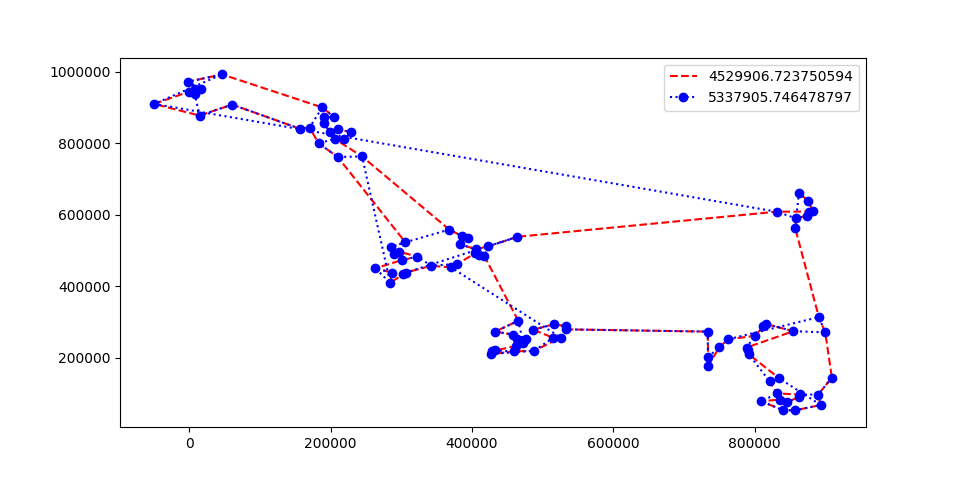

In [77]:
#plt.rcParams['figure.figsize'] = [17, 8]
plt.plot(resultado_vnd_x,resultado_vnd_y ,'r--', label=str(distancia_percurso(resultado_vnd)))
plt.plot(vmp_array_x,vmp_array_y ,'ob:', label=str(vmp_dist))
plt.legend()
plt.show()

# Aplicando GRASP

## construcao_solucao(alfa)

### lista_de_candidatos(LC)

Lista de candidatos criada aleatóriamente

### Lista restrita de candidatos(LRC)

Criada através da restrição setada por alfa [0,1)

O tamanho de LCR é determinado por:

Cardinalidade LCR = $\alpha$ * Cardinalidade LC



In [81]:
def GRASP(N_iteracoes, alfa):
    for i in range(N_iteracoes):
        solucao = construcao_solucao(alfa)
        solucao = busca_local(solution)
        memoriza_melhor_solucao_encontrada(Solution)
    return melhor_solucao

In [113]:
def construcao_solucao_ALTAMENTE_ALEATORIA(alfa):
    import random
    random.seed(42)
    solucao = list(pontos)
    random.shuffle(solucao)
    print(solucao)
    print(solucao[0], pontos[0])
    print(solucao[5], pontos[5])
    print(solucao[12], pontos[12])

In [ ]:
def VIZINHOS_MAIS_PROXIMOS(array_points):
    
    points = list(array_points)
    
    if len(points) == 0:
        return []
    
    # Escolhe o vértice inicial
    current = points[0]
    # Armazena em um array, que terá o caminho criado pelo nnpoints
    nnpoints = [current]
    # Remove do conjuto total
    points.remove(current)
    # Repete até que o conjunto inicial acabe
    while len(points) > 0:
        next = points[0]
        # Escolhe um vértice u mais próximo de um dos extremos de C
        for point in points:
            if dist(current, point) < dist(current, next):
                next = point
        # Acrescenta o vértice no array
        nnpoints.append(next)
        # Remove do conjunto
        points.remove(next)
        # considera que o novo nó a ser utilizado será o do final
        current = next
        # Numeros faltantes de pontos
        print("Len points", len(points), end="\r")
    return nnpoints, distancia_percurso(nnpoints)

In [114]:
construcao_solucao(1)

[[379088, 462092], [514983, 255743], [875201, 638780], [322951, 482476], [790299, 222617], [854857, 274014], [515900, 293384], [433031, 273100], [285304, 509376], [46544, 991990], [210576, 838273], [733728, 272905], [899974, 270833], [410249, 486800], [476353, 252387], [734361, 202145], [864516, 97130], [459223, 217446], [405575, 503282], [263493, 449754], [839702, 53295], [465661, 303075], [788676, 228431], [342458, 456966], [296723, 496584], [429136, 217774], [305, 944070], [394447, 535920], [370610, 452339], [893672, 67722], [857298, 563760], [210127, 761052], [464522, 538023], [284467, 408920], [7985, 936064], [890948, 313367], [-49622, 909497], [290493, 491001], [525810, 256373], [862896, 89943], [862867, 661178], [385610, 540524], [791767, 209472], [-1956, 971327], [60699, 907576], [188361, 899648], [464540, 253358], [877544, 608557], [457973, 264541], [427627, 210462], [462823, 233052], [306631, 437966], [749939, 228922], [183091, 799592], [156139, 840365], [873543, 597348], [76